In [7]:
import yfinance as yf

# Extract Tesla stock data
tesla_data = yf.Ticker('TSLA').history(period='1mo')

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Display the first five rows using the head function
tesla_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-06-25 00:00:00-04:00,184.399994,187.970001,182.009995,187.350006,63678300,0.0,0.0
1,2024-06-26 00:00:00-04:00,186.539993,197.759995,186.360001,196.369995,95737100,0.0,0.0
2,2024-06-27 00:00:00-04:00,195.169998,198.720001,194.050003,197.419998,72746500,0.0,0.0
3,2024-06-28 00:00:00-04:00,199.550003,203.199997,195.259995,197.880005,95438100,0.0,0.0
4,2024-07-01 00:00:00-04:00,201.020004,213.229996,200.850006,209.860001,135691400,0.0,0.0


In [9]:
import yfinance as yf

# Extract GME stock data
gme_data = yf.download('GME', start='2021-01-01', end='2021-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

# Save the data if needed
# gme_data.to_csv('gme_stock_data.csv')

# Display the first five rows of the GME data dataframe using the head function
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close    Volume
0 2021-01-04  4.7500  4.7750  4.2875  4.3125     4.3125  40090000
1 2021-01-05  4.3375  4.5200  4.3075  4.3425     4.3425  19846000
2 2021-01-06  4.3350  4.7450  4.3325  4.5900     4.5900  24224800
3 2021-01-07  4.6175  4.8625  4.5050  4.5200     4.5200  24517200
4 2021-01-08  4.5450  4.5750  4.2700  4.4225     4.4225  25928000


Matplotlib is building the font cache; this may take a moment.
[*********************100%%**********************]  1 of 1 completed


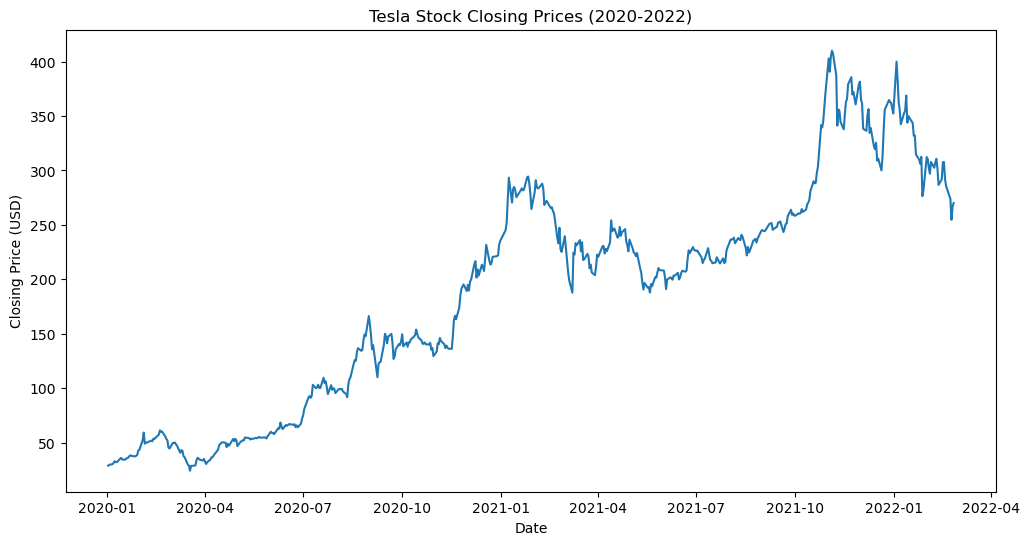

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2022-02-26')

# Create a line graph of the closing prices
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.show()

make_graph(tesla_data, 'Tesla Stock Closing Prices (2020-2022)')

[*********************100%%**********************]  1 of 1 completed


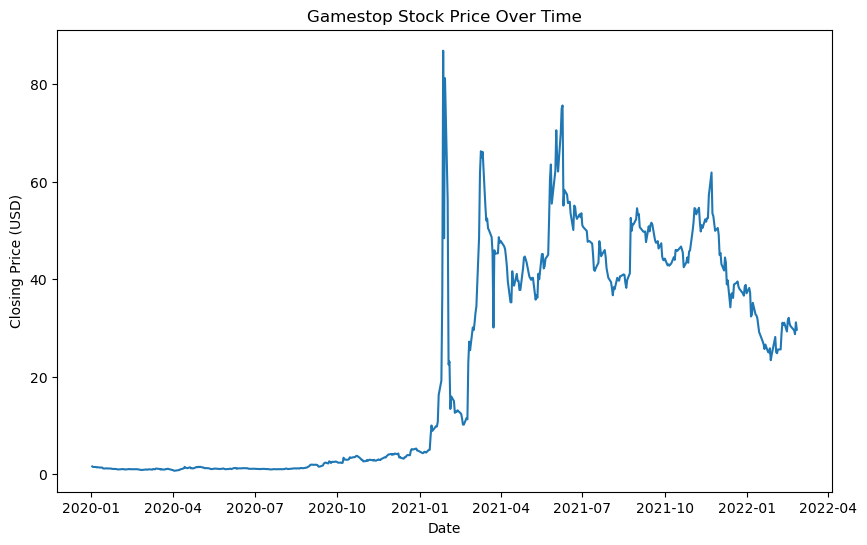

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt

# Load Gamestop's stock data from Yahoo Finance
gamestop_stock_data = yf.download('GME', start='2020-01-01', end='2022-02-26')

# Reset the index to get a 'Date' column
gamestop_stock_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.show()

# Call the make_graph function with the loaded data
make_graph(gamestop_stock_data, 'Gamestop Stock Price Over Time')

In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Send a GET request to the Wikipedia page with Tesla's revenue data
url = "https://en.wikipedia.org/wiki/Tesla,_Inc.#Financial_results"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the revenue data
table = soup.find('table', {'class': 'wikitable'})

# Extract the table headers
headers = [th.text.strip() for th in table.find("tr").find_all('th')]

# Extract the table data
data = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append([col for col in cols if col])  # Get rid of empty values

# Create a Pandas dataframe from the extracted data
df = pd.DataFrame(data, columns=headers)

# Display the Last five rows of the dataframe using the tail function
print(df.tail())

  Opened                            Name                   City  \
1   2016              Gigafactory Nevada  Storey County, Nevada   
2   2017            Gigafactory New York      Buffalo, New York   
3   2019            Gigafactory Shanghai               Shanghai   
4   2022  Gigafactory Berlin-Brandenburg              Grünheide   
5   2022               Gigafactory Texas          Austin, Texas   

         Country Employees                        Products             Ref.  
1  United States     7,000      Batteries, Powerwall, Semi  [209][210][211]  
2  United States     1,500        Solar Roof, Supercharger       [212][213]  
3          China    20,000  Model 3, Model Y, Supercharger       [214][215]  
4        Germany    10,000                         Model Y  [216][217][218]  
5  United States    12,000             Model Y, Cybertruck  [219][220][221]  


In [45]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Send a GET request to the Wikipedia page containing GME revenue data
url = "https://en.wikipedia.org/wiki/GameStop#Financial_performance"
response = requests.get(url)

# Parse the HTML Content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing revenue data
table = soup.find('table', {'class': 'wikitable'})

# Extract the table headers
headers = [th.text.strip() for th in table.find('tr').find_all('th')]

# Extract the table data
data = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == len(headers):  # Check if the number of columns matches headers
        data.append(cols)

# Create a Pandas dataframe
gme_revenue = pd.DataFrame(data, columns=headers)

# Display the last five rows of the dataframe
print(gme_revenue.tail())

Empty DataFrame
Columns: [, Australia Division, Canada Division, Europe Division, United States Division, Technology Brands, Total]
Index: []
